# Importanto bibliotecas

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [74]:
import json

# Carrega o JSON em formato aninhado
with open("TelecomX_Data.json", "r") as f:
    raw_data = json.load(f)

# Transforma o JSON em DataFrame (pode exigir normaliza√ß√£o)
df = pd.json_normalize(raw_data)

In [75]:
# Verifica valores √∫nicos da coluna 'Churn' antes da limpeza
churn_before = df['Churn'].value_counts(dropna=False)

# Remove registros onde 'Churn' est√° vazio ou nulo
df_cleaned = df[df['Churn'].isin(['Yes', 'No'])].copy()

# Verifica valores √∫nicos da coluna 'Churn' ap√≥s a limpeza
churn_after = df_cleaned['Churn'].value_counts(dropna=False)

# Verifica se h√° outros valores ausentes no DataFrame limpo
missing_values = df_cleaned.isnull().sum()

# Exibe os resultados
churn_before, churn_after, missing_values[missing_values > 0]
# Verifica se h√° outros campos nulos

(Churn
 No     5174
 Yes    1869
         224
 Name: count, dtype: int64,
 Churn
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 Series([], dtype: int64))

In [76]:
print(df.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [77]:
# Separando vari√°veis explicativas (X) e alvo (y)
x = df.drop('Churn', axis =1)
y = df ['Churn']

print(f'x: {x.shape}, y: {y.shape}')

print("Antes da Divis√£o:", x.shape, y.shape)
assert len(x) == len(y), "Erro: x e y devem ter o mesmo n√∫mero de linhas!"
df_info = df.info()
df_head = df.head()
df_describe = df.describe(include='all')

print(df_head, df_info, df_describe)

x: (7267, 20), y: (7267,)
Antes da Divis√£o: (7267, 20) (7267,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null

In [78]:
# Copiando o DataFrame limpo
df_model = df_cleaned.copy()

# Verifica colunas categ√≥ricas (tipo 'object')
categorical_columns = df_model.select_dtypes(include='object').columns.tolist()

# Mostra as colunas categ√≥ricas para inspe√ß√£o
categorical_columns

['customerID',
 'Churn',
 'customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Total']

In [79]:
# Remove a coluna de ID
df_model.drop(columns=['customerID'], inplace=True)

# Converte a vari√°vel alvo 'Churn' para 0 (No) e 1 (Yes)
df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

# Converte a coluna 'account.Charges.Total' de string para float
df_model['account.Charges.Total'] = pd.to_numeric(df_model['account.Charges.Total'], errors='coerce')

# Aplica One-Hot Encoding nas demais colunas categ√≥ricas (ignora 'Churn' que j√° est√° bin√°rio)
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Verifica as primeiras colunas e o shape final
df_encoded.head(), df_encoded.shape

(   Churn  customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
 0      0                       0                9                     65.6   
 1      0                       0                9                     59.9   
 2      1                       0                4                     73.9   
 3      1                       1               13                     98.0   
 4      1                       1                3                     83.9   
 
    account.Charges.Total  customer.gender_Male  customer.Partner_Yes  \
 0                 593.30                 False                  True   
 1                 542.40                  True                 False   
 2                 280.85                  True                 False   
 3                1237.85                  True                  True   
 4                 267.40                 False                  True   
 
    customer.Dependents_Yes  phone.PhoneService_Yes  \
 0                     True  

In [80]:
df


customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No                9                Yes   
2                  No                  No                4                Yes   
3                 Yes                  No               13                Yes   
4                 Yes                  No                3                Yes   
...               ...                 ...              ...                ...   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
0                     No                      DSL  ...                   Yes   
1                    Yes                      DSL  ...                    No   
2                     No              Fiber optic  ...                    No   
3                     No              Fiber optic  ...                   Yes   
4                     No              Fiber optic  ...                    No   
...                  ...                      ...  ...                   ...   
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                           No                  Yes                  Yes   
1                           No                   No                   No   
2                          Yes                   No                   No   
3                          Yes                   No                  Yes   
4                           No                  Yes                  Yes   
...                        ...                  ...                  ...   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                          No         One year                      Yes   
1                         Yes   Month-to-month                       No   
2                          No   Month-to-month                      Yes   
3                         Yes   Month-to-month                    

In [81]:
# Estat√≠sticas descritivas b√°sicas para todas as colunas num√©ricas
desc_stats = df_encoded.describe().T  # Transposta para melhor leitura

# Adiciona a mediana separadamente
desc_stats["median"] = df_encoded.median()

desc_stats[['mean', 'median', 'std', 'min', 'max']]  # Mostra apenas as colunas mais relevantes

mean    median          std    min      max
Churn                       0.265370     0.000     0.441561   0.00     1.00
customer.SeniorCitizen      0.162147     0.000     0.368612   0.00     1.00
customer.tenure            32.371149    29.000    24.559481   0.00    72.00
account.Charges.Monthly    64.761692    70.350    30.090047  18.25   118.75
account.Charges.Total    2283.300441  1397.475  2266.771362  18.80  8684.80

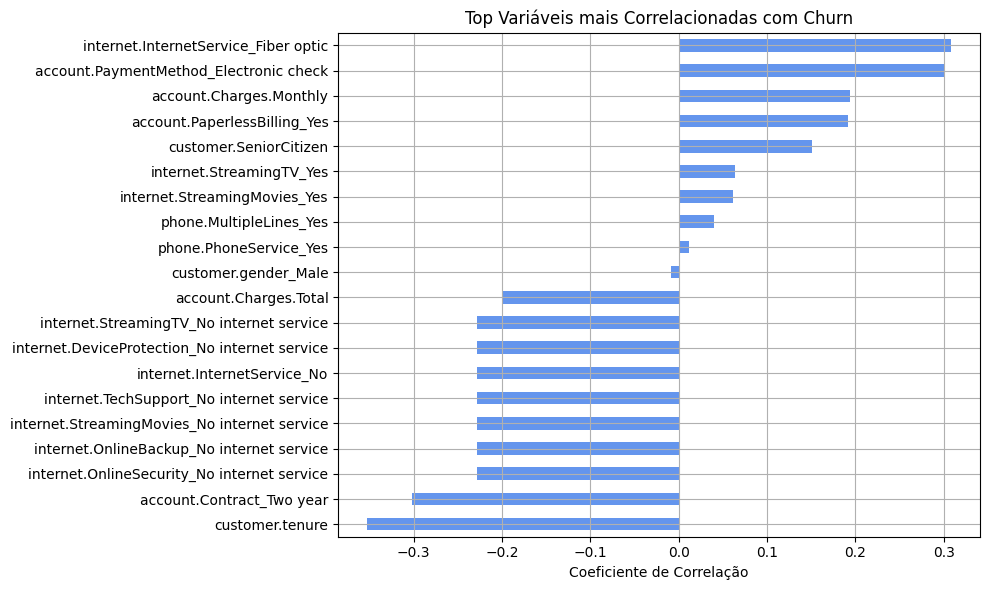


Matriz de Confus√£o:
[[921 114]
 [198 176]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



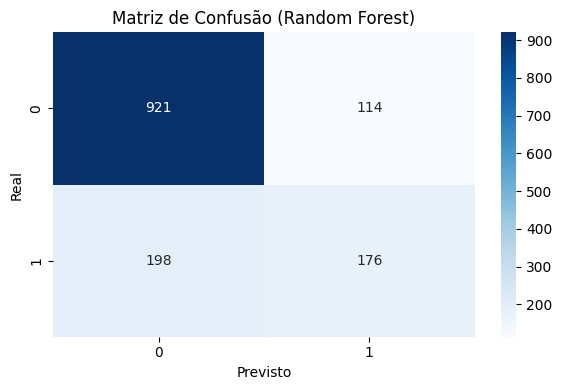

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Seleciona as vari√°veis mais correlacionadas
top_features = selecionar_variaveis_mais_correlacionadas(df_encoded, n_top=10)

# 2. Treina o modelo e obt√©m dados de teste
modelo_final, X_test, y_test = treinar_modelo_com_variaveis(df_encoded, top_features)


def treinar_modelo_com_variaveis(df_encoded, top_features, target_col='Churn'):
    """
    Treina e avalia um modelo RandomForest usando apenas as vari√°veis mais relevantes.
    Retorna o modelo treinado e os dados de teste.
    """
    X = df_encoded[top_features]
    y = df_encoded[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print("\nMatriz de Confus√£o:")
    print(confusion_matrix(y_test, y_pred))

    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred))

    return modelo, X_test, y_test



Matriz de Confus√£o:
[[921 114]
 [198 176]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



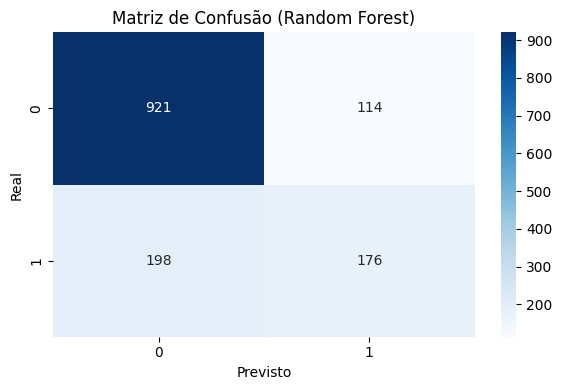

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Defina a fun√ß√£o (com prints)
def treinar_modelo_com_variaveis(df_encoded, top_features, target_col='Churn'):
    X = df_encoded[top_features]
    y = df_encoded[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print("\nMatriz de Confus√£o:")
    print(confusion_matrix(y_test, y_pred))

    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred))

    # Gr√°fico da matriz de confus√£o
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confus√£o (Random Forest)")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()
    return modelo, X_test, y_test

# 2. Depois chame a fun√ß√£o
modelo_final, X_test, y_test = treinar_modelo_com_variaveis(df_encoded, top_features)


In [84]:
def verificar_balanceamento_target(y, nome_variavel='Churn'):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Se y for uma Series, criamos um DataFrame tempor√°rio para plotar
    if isinstance(y, pd.Series):
        df_temp = pd.DataFrame({nome_variavel: y})
    else:
        df_temp = y  # j√° √© um DataFrame

    # Plot da distribui√ß√£o
    sns.countplot(x=nome_variavel, data=df_temp)
    plt.title(f'Distribui√ß√£o da Vari√°vel Alvo ({nome_variavel})')
    plt.xlabel(f'{nome_variavel} (0 = N√£o, 1 = Sim)')
    plt.ylabel('Contagem')
    plt.show()

    # Porcentagem de cada classe
    classe_counts = df_temp[nome_variavel].value_counts(normalize=True) * 100
    print(f"\nDistribui√ß√£o percentual da vari√°vel alvo ({nome_variavel}):")
    print(classe_counts)

    # Verifica√ß√£o simples
    if classe_counts.min() < 30:
        print("\nA base est√° DESBALANCEADA.")
    else:
        print("\nA base est√° BALANCEADA.")


Antes do SMOTE:


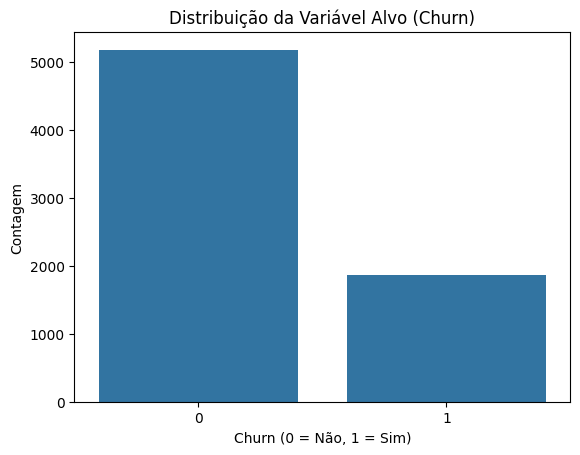


Distribui√ß√£o percentual da vari√°vel alvo (Churn):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

A base est√° DESBALANCEADA.


In [85]:
print("Antes do SMOTE:")
verificar_balanceamento_target(df_encoded['Churn'])

Antes do SMOTE:
Distribui√ß√£o das classes:
 - Classe 0: 5174 (73.46%)
 - Classe 1: 1869 (26.54%)
>>> Base desbalanceada.

Ap√≥s aplica√ß√£o do SMOTE (apenas no treino):
Distribui√ß√£o das classes:
 - Classe 0: 4139 (50.00%)
 - Classe 1: 4139 (50.00%)
>>> Base balanceada.

Matriz de Confus√£o:
[[904 131]
 [184 190]]


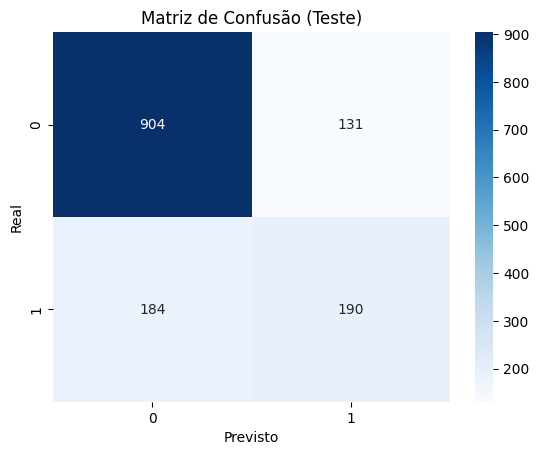


Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Acur√°cia: 0.7764371894960965
Precis√£o: 0.5919003115264797
Recall: 0.5080213903743316
F1-score: 0.5467625899280576

Ap√≥s SMOTE (somente conjunto de treino):


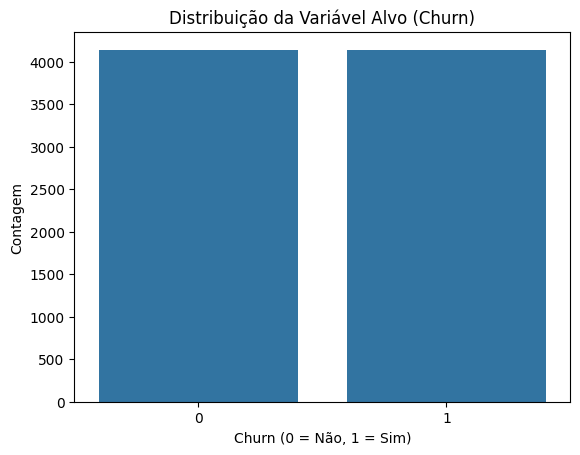


Distribui√ß√£o percentual da vari√°vel alvo (Churn):
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64

A base est√° BALANCEADA.


In [86]:
from sklearn.impute import SimpleImputer

def treinar_com_smote(df_encoded, top_features, target_col='Churn'):
    X = df_encoded[top_features]
    y = df_encoded[target_col]

    print("Antes do SMOTE:")
    avaliar_balanceamento(y)

    # Divide em treino e teste (antes de aplicar SMOTE para evitar vazamento)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Imputar valores faltantes no conjunto de treino
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Aplica SMOTE apenas no conjunto de treino imputado
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

    print("\nAp√≥s aplica√ß√£o do SMOTE (apenas no treino):")
    avaliar_balanceamento(y_train_smote)

    # Treina o modelo RandomForest
    modelo = RandomForestClassifier(random_state=42)
    modelo.fit(X_train_smote, y_train_smote)

    # Prediz no conjunto de teste imputado
    y_pred = modelo.predict(X_test_imputed)

    # Avalia√ß√£o do modelo
    print("\nMatriz de Confus√£o:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confus√£o (Teste)')
    plt.show()

    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred))

    print("Acur√°cia:", accuracy_score(y_test, y_pred))
    print("Precis√£o:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))

    print("\nAp√≥s SMOTE (somente conjunto de treino):")
    verificar_balanceamento_target(pd.Series(y_train_smote, name='Churn'))

    return modelo, X_test_imputed, y_test, y_pred

# Usando as top_features j√° definidas anteriormente:
modelo_smote, X_test_smote, y_test_smote, y_pred_smote = treinar_com_smote(df_encoded, top_features)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


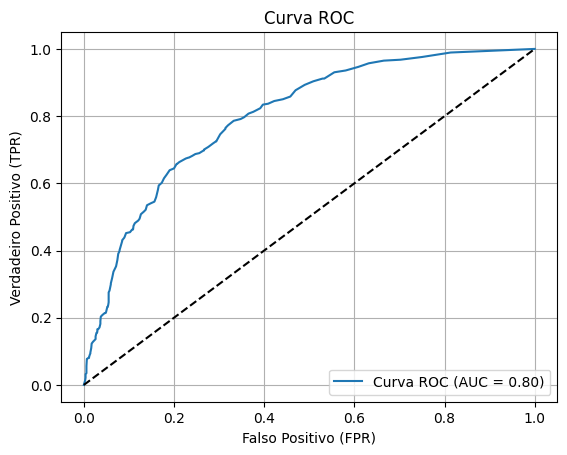


AUC: 0.7994


In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades para classe positiva
y_prob = modelo_smote.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # linha de refer√™ncia
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"\nAUC: {auc:.4f}")



üìå Import√¢ncia das Vari√°veis no Modelo:
                                         Vari√°vel  Import√¢ncia
19                          account.Charges.Total     0.195853
10                                customer.tenure     0.160649
2                         account.Charges.Monthly     0.140888
1          account.PaymentMethod_Electronic check     0.125225
11                      account.Contract_Two year     0.063258
0            internet.InternetService_Fiber optic     0.058895
3                    account.PaperlessBilling_Yes     0.056016
9                            customer.gender_Male     0.037651
4                          customer.SeniorCitizen     0.032258
7                         phone.MultipleLines_Yes     0.026824
6                    internet.StreamingMovies_Yes     0.023688
5                        internet.StreamingTV_Yes     0.022628
13      internet.OnlineBackup_No internet service     0.010042
16  internet.DeviceProtection_No internet service     0.009098
8       

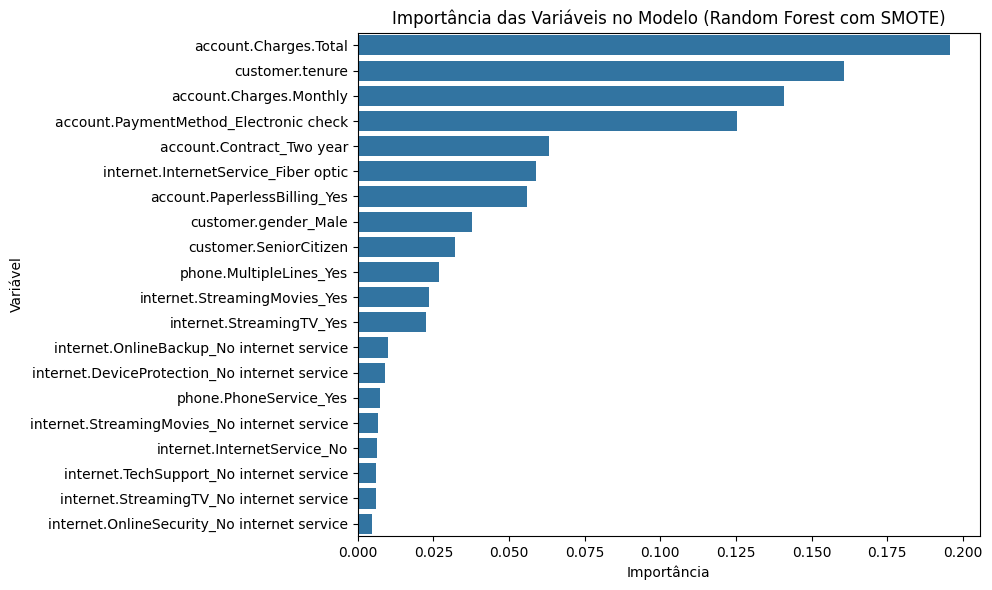

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Obt√©m as import√¢ncias das features
importancias = modelo_smote.feature_importances_

# Cria um DataFrame com os nomes das vari√°veis e suas import√¢ncias
importancia_df = pd.DataFrame({
    'Vari√°vel': X_test.columns,
    'Import√¢ncia': importancias
}).sort_values(by='Import√¢ncia', ascending=False)

# Exibe o DataFrame
print("\nüìå Import√¢ncia das Vari√°veis no Modelo:")
print(importancia_df)

# Plot das import√¢ncias
plt.figure(figsize=(10, 6))
sns.barplot(x='Import√¢ncia', y='Vari√°vel', data=importancia_df)
plt.title('Import√¢ncia das Vari√°veis no Modelo (Random Forest com SMOTE)')
plt.tight_layout()
plt.show()


In [91]:
import joblib

# Caminho e nome do arquivo para salvar
nome_arquivo_modelo = 'modelo_churn_rf_smote.pkl'

# Salvando o modelo treinado
joblib.dump(modelo_smote, nome_arquivo_modelo)

print(f"Modelo salvo com sucesso como '{nome_arquivo_modelo}'!")


Modelo salvo com sucesso como 'modelo_churn_rf_smote.pkl'!


In [103]:
X.loc[:, 'account.Charges.Total'] = X['account.Charges.Total'].fillna(X['account.Charges.Total'].mean())

In [104]:
X = X.fillna(X.mean())  # Exemplo simples de imputa√ß√£o pela m√©dia (s√≥ para vari√°veis num√©ricas)

In [107]:
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # trata NaNs
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

X = df_encoded[top_features]
y = df_encoded['Churn']

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Valida√ß√£o Cruzada (5-fold):")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    scores = cross_val_score(pipeline, X, y, cv=kfold, scoring=metric)
    print(f"{metric.capitalize():<10}: M√©dia = {scores.mean():.4f} | Desvio Padr√£o = {scores.std():.4f}")


Valida√ß√£o Cruzada (5-fold):
Accuracy  : M√©dia = 0.7811 | Desvio Padr√£o = 0.0091
Precision : M√©dia = 0.5986 | Desvio Padr√£o = 0.0179
Recall    : M√©dia = 0.5313 | Desvio Padr√£o = 0.0300
F1        : M√©dia = 0.5626 | Desvio Padr√£o = 0.0224


In [108]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Definir pipeline com imputa√ß√£o, SMOTE e RandomForest
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Espa√ßo de busca para hiperpar√¢metros do RandomForest
param_dist = {
    'rf__n_estimators': [100, 200, 300, 400, 500],
    'rf__max_depth': [None, 10, 20, 30, 40, 50],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=30,               # n√∫mero de combina√ß√µes testadas
    scoring='f1',            # m√©trica para otimiza√ß√£o (pode mudar)
    cv=kfold,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Rodar busca
random_search.fit(X, y)

print("Melhores par√¢metros encontrados:")
print(random_search.best_params_)

print(f"Melhor F1-score na valida√ß√£o cruzada: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, *

Melhores par√¢metros encontrados:
{'rf__n_estimators': 300, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 2, 'rf__max_features': 'log2', 'rf__max_depth': 10}
Melhor F1-score na valida√ß√£o cruzada: 0.6190


In [109]:
# Atualiza o pipeline com os melhores par√¢metros encontrados
best_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='log2',
        random_state=42
    ))
])

# Avalia√ß√£o com k-fold usando as m√©tricas
print("Avalia√ß√£o do modelo otimizado (5-fold):")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    scores = cross_val_score(best_pipeline, X, y, cv=kfold, scoring=metric)
    print(f"{metric.capitalize():<10}: M√©dia = {scores.mean():.4f} | Desvio Padr√£o = {scores.std():.4f}")

Avalia√ß√£o do modelo otimizado (5-fold):
Accuracy  : M√©dia = 0.7906 | Desvio Padr√£o = 0.0081
Precision : M√©dia = 0.5981 | Desvio Padr√£o = 0.0124
Recall    : M√©dia = 0.6421 | Desvio Padr√£o = 0.0347
F1        : M√©dia = 0.6190 | Desvio Padr√£o = 0.0201


In [111]:
import joblib

# Salva o pipeline completo com o nome desejado
joblib.dump(best_pipeline, 'modelo_churn_rf_pipeline.joblib')

['modelo_churn_rf_pipeline.joblib']

In [ ]:
# Carrega o pipeline treinado
modelo_carregado = joblib.load('modelo_churn_rf_pipeline.joblib')

# Fazer previs√µes
y_pred = modelo_carregado.predict(novos_dados)


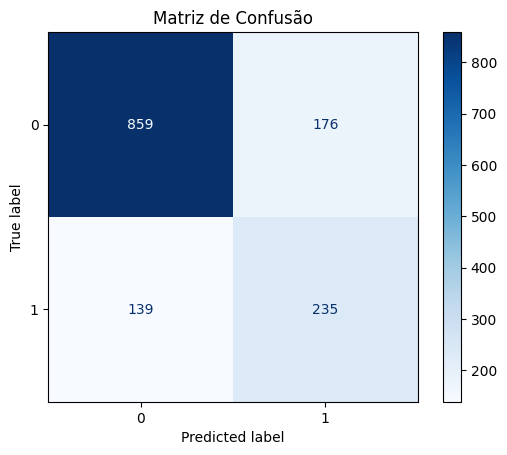

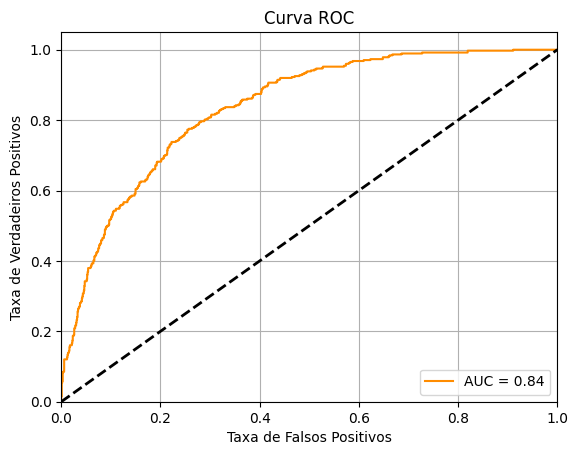

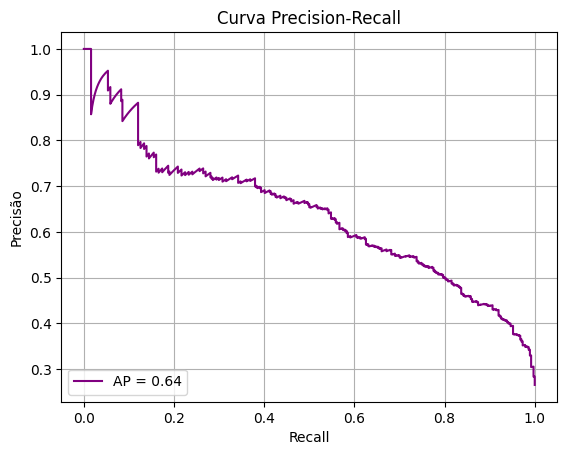

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)

# Divide dados em treino/teste (s√≥ para gerar gr√°ficos ‚Äî n√£o para valida√ß√£o cruzada)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Treina o pipeline otimizado no conjunto de treino
best_pipeline.fit(X_train, y_train)

# Previs√µes e probabilidades
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva

# === 1. MATRIZ DE CONFUS√ÉO ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confus√£o")
plt.show()

# === 2. CURVA ROC ===
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# === 3. CURVA PRECIS√ÉO-RECALL (PR Curve) ===
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, label=f'AP = {ap:.2f}', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precis√£o')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [114]:
X = df_encoded[top_features]

/tmp/ipython-input-115-2721763803.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


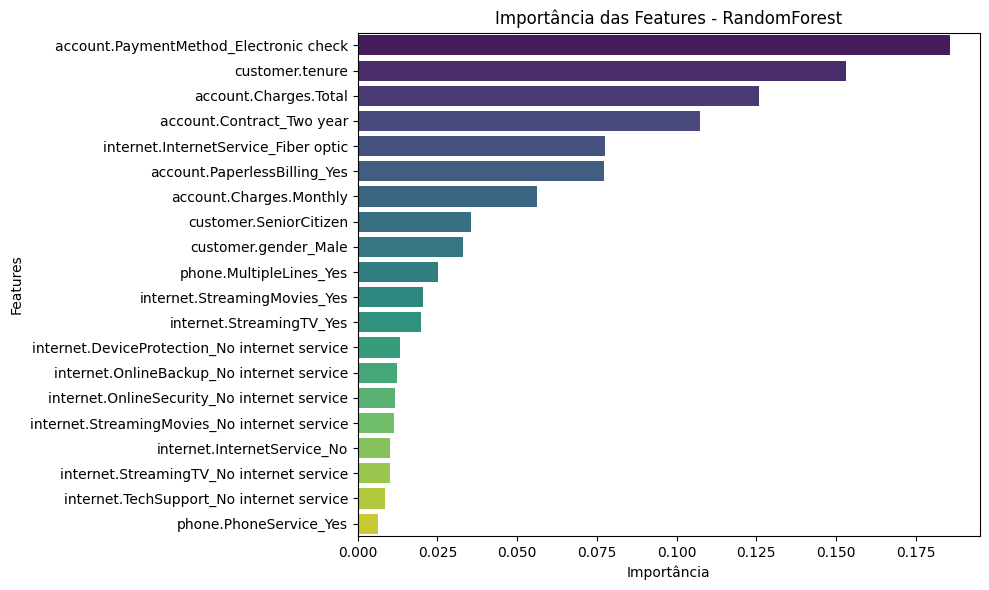

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extrai o modelo RandomForest do pipeline treinado
rf_model = best_pipeline.named_steps['rf']

# Usa os nomes das colunas de entrada (X)
feature_names = X.columns

# Pega as import√¢ncias
importances = rf_model.feature_importances_

# Cria um DataFrame com as import√¢ncias
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotar
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Import√¢ncia das Features - RandomForest')
plt.xlabel('Import√¢ncia')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [118]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import pandas as pd

# Inicializa a API
app = FastAPI(title="API de Previs√£o com RandomForest")

# Carrega o pipeline treinado
modelo = joblib.load("modelo_churn_rf_pipeline.joblib")

# Define a estrutura da entrada com Pydantic
class DadosEntrada(BaseModel):
    Feature1: float
    Feature2: float
    Feature3: float
    # ... adicione todas as features que o modelo espera

@app.post("/prever")
def prever(dados: DadosEntrada):
    # Converte para DataFrame
    entrada_df = pd.DataFrame([dados.dict()])

    # Faz a previs√£o
    pred = modelo.predict(entrada_df)[0]
    prob = modelo.predict_proba(entrada_df)[0].tolist()

    return {
        "classe_predita": int(pred),
        "probabilidades": prob
    }

In [120]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import pandas as pd

# Inicializa a API
app = FastAPI(title="API de Previs√£o com RandomForest")

# Carrega o pipeline treinado
modelo = joblib.load("modelo_churn_rf_pipeline.joblib")

# Define a estrutura da entrada com Pydantic
class DadosEntrada(BaseModel):
    Feature1: float
    Feature2: float
    Feature3: float
    # ... adicione todas as features que o modelo espera

@app.post("/prever")
def prever(dados: DadosEntrada):
    # Converte para DataFrame
    entrada_df = pd.DataFrame([dados.dict()])

    # Faz a previs√£o
    pred = modelo.predict(entrada_df)[0]
    prob = modelo.predict_proba(entrada_df)[0].tolist()

    return {
        "classe_predita": int(pred),
        "probabilidades": prob
    }